In [171]:
import numpy as np
import math

points = np.random.uniform(low=-10, high=10, size=(100, 2))
points = np.asarray(points)

In [172]:
# x = np.random.uniform(-10, 10, 100)
# 
# points = []
# 
# for i in x:
#     points.append((i,i**2))
# points = np.asarray(points)

In [173]:
test_points = points.copy()

In [174]:
points

array([[ 6.20349   , -1.93564195],
       [-8.5839693 ,  3.75246645],
       [-4.52514096, -2.47751388],
       [ 1.25984999, -8.11273097],
       [ 9.04450062,  2.5232785 ],
       [-4.23548603, -8.30894486],
       [-7.37100783,  8.64362767],
       [-6.19865397,  9.68357172],
       [-1.83242475, -2.1118248 ],
       [-2.93647095, -3.75891991],
       [-7.99030115,  9.57101425],
       [ 1.6544522 , -8.06941531],
       [-6.43561567, -0.42574744],
       [ 2.47849819,  5.61228706],
       [-5.7019299 , -9.77792754],
       [ 1.0125935 , -3.38899777],
       [-9.82344814, -4.00597485],
       [-8.00656744,  6.82067326],
       [ 7.5710866 , -2.1023579 ],
       [ 4.31486747, -1.53694988],
       [ 3.14072652,  3.79710356],
       [ 4.90276476,  7.53781022],
       [-4.98558072, -6.99403886],
       [-9.087815  , -2.72805031],
       [ 6.65975529, -9.23277058],
       [-8.55903404, -4.82927944],
       [ 7.52322755,  4.6952731 ],
       [ 1.62654105,  4.34524416],
       [-1.79178848,

In [175]:
np.linalg.norm(points[0,:])

6.49846119854384

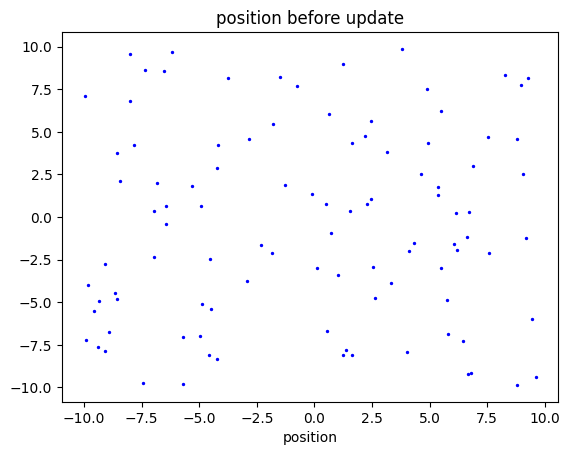

In [176]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(points)
max_num = np.max(points)

# 1차원 선 그리기
# plt.figure(figsize=(10, 2))

# nums 값들을 선 위에 점으로 시각화
for point in points:
    plt.scatter(point[0], point[1], color='b', s=2)

plt.title('position before update')
plt.xlabel('position')
plt.show()

In [177]:
# from scipy.stats import norm
# from scipy.spatial.distance import cdist
# 
# count = 0
# 
# while count < 100:
# 
#     # dens = np.zeros(len(points))
#     dens = []
#     vec = np.zeros((len(points), 2))
# 
#     for i in range(len(points)):
#         sum_pdf = 0
#         vec_total = 0
# 
#         # 여기에 가우시안 넣어야 될듯
#         for num2 in points:
#             if not np.array_equal(points[i], num2):
#                 # gaussian 커널로 점들간 거리에 따라 확률추정
#                 # 이게 벡터의 크기
#                 distance = np.linalg.norm(points[i] - num2)
#                 p = norm.pdf(distance, 0, 1)
#                 # 점 num에서 확률추정
#                 sum_pdf += p
# 
#                 vec_total += p * (points[i] - num2) / distance
# 
#         dens.append(sum_pdf / (len(points)-1))
#         vec[i] = vec_total
# 
#     dens /= np.sum(dens)
#     points += vec
#     count += 1

In [178]:
from scipy.stats import norm
import numpy as np
from scipy.spatial.distance import cdist

# 가우시안 커널 함수
def gaussian_kernel(x, sigma=1):
    return np.exp(-0.5 * (x / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

count = 0
enp = [float('inf')]

while True:
    diff_matrix = cdist(points, points)

    np.fill_diagonal(diff_matrix, np.inf)

    # 가우시안 커널 밀도 계산
    pdf_matrix = gaussian_kernel(diff_matrix)

    # 각 점에서의 밀도 및 벡터 업데이트 계산
    dens = np.sum(pdf_matrix, axis=1) / (len(points) * (len(points) - 1))
    vec = np.sum(pdf_matrix[:, :, np.newaxis] * (points[:, np.newaxis, :] - points[np.newaxis, :, :]) / diff_matrix[:, :, np.newaxis], axis=1)

    # points[:, 1] = points[:, 0] ** 2  # y값을 x^2로 고정

    # 엔트로피 계산
    current_entropy = -np.sum(dens * np.log(dens))

    enp.append(current_entropy)

    # 엔트로피 변화가 매우 작을 때 중지
    if abs(enp[-2] - current_entropy) < 1e-5 and current_entropy == min(enp):
        break

    points += 0.9 * vec  # vec의 크기 조절
    count += 1


In [184]:
# from scipy.stats import norm
# import numpy as np
# from scipy.spatial.distance import cdist
# 
# # 가우시안 커널 함수
# def gaussian_kernel(x, sigma=1):
#     return np.exp(-0.5 * (x / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))
# 
# count = 0
# enp = [float('inf')]
# 
# 
# while count < 1000:
#     diff_matrix = cdist(test_points, test_points)
# 
#     np.fill_diagonal(diff_matrix, np.inf)
# 
#     # 가우시안 커널 밀도 계산
#     pdf_matrix = gaussian_kernel(diff_matrix)
# 
#     # 각 점에서의 밀도 및 벡터 업데이트 계산
#     dens = np.sum(pdf_matrix, axis=1) / (len(test_points) * (len(test_points) - 1))
#     vec = np.sum(pdf_matrix[:, :, np.newaxis] * (test_points[:, np.newaxis, :] - test_points[np.newaxis, :, :]) / diff_matrix[:, :, np.newaxis], axis=1)
# 
#     # points[:, 1] = points[:, 0] ** 2  # y값을 x^2로 고정
# 
#     # 엔트로피 계산
#     current_entropy = -np.sum(dens * np.log(dens))
# 
#     enp.append(current_entropy)
# 
#     # # 엔트로피 변화가 매우 작을 때 중지
#     # if abs(enp[-2] - current_entropy) < 1e-5 and current_entropy == min(enp):
#     #     break
# 
#     test_points += 0.9 * vec  # vec의 크기 조절
#     count += 1


322


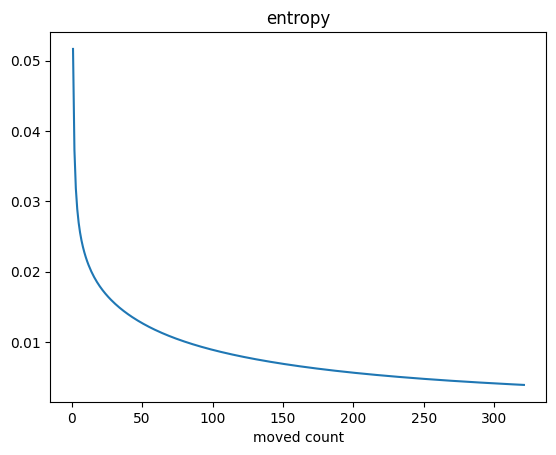

In [180]:
plt.title('entropy')
plt.xlabel('moved count')
plt.plot(enp)
print(len(enp))

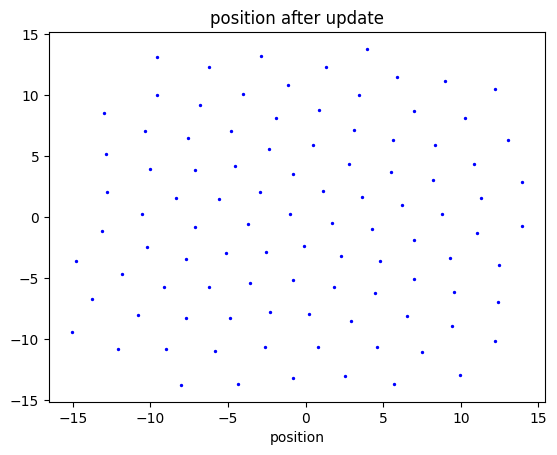

In [181]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(points)
max_num = np.max(points)

# 1차원 선 그리기
# plt.figure(figsize=(10, 2))

# nums 값들을 선 위에 점으로 시각화
for point in points:
    plt.scatter(point[0], point[1], color='b', s=2)

plt.title('position after update')
plt.xlabel('position')
plt.show()

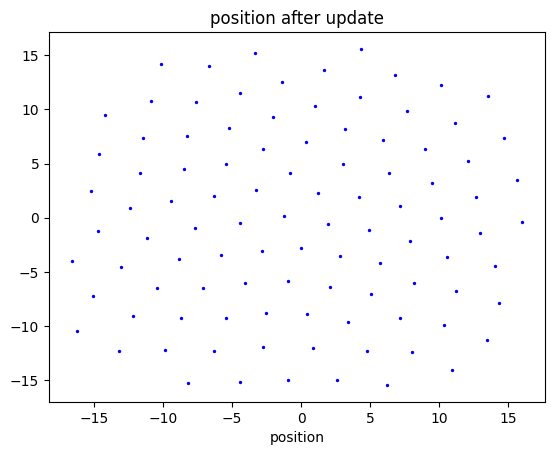

In [185]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(points)
max_num = np.max(points)

# 1차원 선 그리기
# plt.figure(figsize=(10, 2))

# nums 값들을 선 위에 점으로 시각화
for point in test_points:
    plt.scatter(point[0], point[1], color='b', s=2)

plt.title('position after update')
plt.xlabel('position')
plt.show()

In [183]:
vec

array([[ 3.74752561e-03, -5.53195242e-04],
       [-5.64321462e-03,  2.07902003e-03],
       [-2.01971596e-03, -1.59935565e-03],
       [-8.71957996e-04, -6.08047733e-03],
       [ 5.29635732e-03,  1.76310466e-03],
       [-2.84758198e-04, -3.78022930e-03],
       [-4.20432063e-03,  2.01440953e-03],
       [-1.75928327e-03,  4.67794002e-03],
       [-1.06803978e-03, -7.12930589e-04],
       [-1.28202070e-03, -2.12111743e-03],
       [-8.69490684e-04,  3.46950927e-03],
       [-1.32360994e-05, -5.66545466e-03],
       [-2.18129416e-03, -1.52253911e-04],
       [ 2.25016215e-03,  3.83816120e-03],
       [ 1.03704730e-03, -4.01039262e-03],
       [ 1.17924522e-03, -1.45924480e-03],
       [-5.54127209e-03, -1.08656883e-03],
       [-3.79122583e-03,  9.17456523e-04],
       [ 4.83281663e-03, -1.58998654e-03],
       [ 1.74105723e-03, -4.71793672e-04],
       [ 1.00014699e-03,  1.47784568e-03],
       [ 2.62706090e-03,  5.40854325e-03],
       [-1.25666440e-03, -3.12589374e-03],
       [-5.